# Grade: /100 pts

# Lab Assignment 04: Confidence Intervals & The Bootstrap

Once you are finished, ensure to complete the following steps.
1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.
2.  Fix any errors which result from this.
3.  Repeat steps 1. and 2. until your notebook runs without errors.
4.  Submit your completed notebook to OWL by the deadline.

In [1]:
# Add the necessary imports for this homework 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem, t
import seaborn as sns
import sklearn.model_selection
import sklearn.linear_model as lm



### Question 1: /10pts 
In this question, you will construct a confidence interval for the sample mean, not using the normal distribution, but the t-distribution (see end of lecture 4.3), which is more accurate for small sample sizes.  

The $100(1-\alpha)\%$ confidence interval is 

$$ \bar{x} \pm  t_{1-\alpha/2, n-1} \dfrac{\hat{\sigma}}{\sqrt{n}} $$

Where $ t_{1-\alpha/2, n-1}$ is the appropiorate quantile of a Student's t distribution with $n-1$ degrees of freedom.  
Write a function called `confidence_interval` which takes as it's argument an array of data called `data` and returns two things:

* An estimated mean of `data`, and 

* The lower and upper bounds of the 95% confidence interval for the mean of `data`.  Ensure these are returned in a numpy array of shape (2,)

To get the appropirate quantiles for the t-distribution, you can use `scipy.stats.t`, which implements some statistical functions for the t-distribution.  Take a look at the documentation for `scipy.stats.t`, especially the `ppf` method.

Here is the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html


In [2]:
def confidence_interval(data):

    # Note, np.std divides by n and not n-1
    # Force it to apply the correct formula by ussing ddof=1
    # Alternaively, you can use scipy.stats.sem to compute
    #The standard error
    confidence = 0.95
    estimated_mean = np.mean(data)#np.sum(data)/len(data)
    std_err = sem(data)
    h = std_err * t.ppf((1 + confidence) / 2, len(data) - 1)
    upper = estimated_mean + h
    lower = estimated_mean - h 
    bounds = np.array([lower,upper])
    
    return estimated_mean, bounds

data = [1,2,3]
estimated_mean, bounds = confidence_interval(data)
assert bounds.size == 2


### Question 2: /15pts

The "95% confidence interval" is named so because the long term relative frequency of these estimators containing the true estimand is 95%.  That is to say **if I construct 100 95% confidence intervals for the sample mean again and again from the same data generating mechanism, 95 of these intervals I construct will contain the true population mean**.

Write a function called `ci_simulation` that runs some simulations to show this is the case.  From a standard normal distirbution, sample 25 observations and construct a confidence interval.  Do this 20 times and plot the intervals using `matplotlib.pyplot.errorbar`.  Color the bar red if the confidence interval does not capture the true mean and blue if it does.  If you are unfamilliar with `matplotlib.pyplot.errorbar`, I highly suggest reading Matplotlib's excellent documentation which has some examples at the bottom of the webpage.

If you are unfamilliar with how to sample random numbers, I suggest you look at `numpy.random.normal`.  Try searching for the documentation for that function yourself if you need to.

Here is the documentation for `matplotlib.pyplot.errorbar`: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html

[ 1.19451626 -0.49872072 -0.08073961  1.9378714   0.60883722  0.097539
  1.34742912  1.4001608   1.28997872 -0.54618499 -0.38478664  0.75213436
  1.19236503 -1.19506206 -0.45502352 -0.22968969  1.00724711 -1.08300264
  2.70496343  0.09005406  0.62008331  2.229865    0.6291721   0.75514154
 -0.17191765]
0.5284892373013114


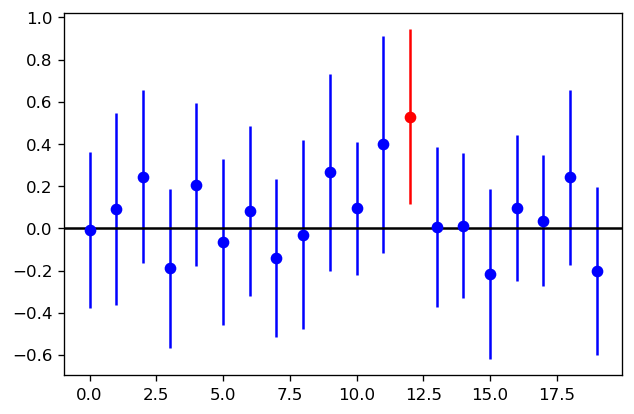

In [3]:
def ci_simulation():
    # Set the random seed to always get the same random numbers. 
    # This is for Reproducibility. 
    np.random.seed(4)
    
    # Create the figure.
    fig, ax = plt.subplots(dpi = 120)

    # If the interval crosses this line, it should be blue, else red.
    ax.axhline(0, color = 'k')

    # Do the following 20 times
    for i in range(20):

        #Draw 25 observations from a standard normal
        rand = np.random.normal(size=25)
        # Compute what we need for the CI, namely the mean and the bounds
        estimated_mean, bounds = confidence_interval(rand)
        
        # color should be blue if it crosses the black line
        color = 'blue'
        if (min(bounds)>0)|(max(bounds)<0):
            # but in the case it does not, turn it red
            color = 'red'
            print(rand)
            print(np.mean(rand))


        # Need to get the length of the interval from bounds
        interval_len = 1.0/2*(bounds[1] - bounds[0])
        ax.errorbar(i, estimated_mean, yerr=interval_len, color = color, fmt = 'o')

    # This function does not have to return anything
    return None

ci_simulation()

### Question 3: /8pts

If you haven't changed the random seed from 4 and if you implemented the solution correctly, you should one red interval.

Answer the following below in no more than 3 sentences:

a) How many red intervals did we expect to see?  What is your justifiation for this?

Changing the random seed might affect how many red intervals you see.  Try changing the  random seed in your function to 3.  This will yield two red intervals (which is different than what you should expect to see). 

b) Why does the simulation sometimes deviate from the predicted results?


a)  Since we are taking a 95% confidence interval on the data, we expect 95% of the constructed intervals to contain the true mean. 0.95*20 = 19 intervals that should contain the true mean, and hence 20 (total) - 19 = 1 that does not contain the true mean, as we see above.

b) The simulation gathers a set of 25 random samples from a normal distribution. Since this set is completely random, it can generate random numbers with high magnitudes from the normal distribution or many values of the same signage. In these cases, the confidence interval may not contain the true population mean since the estimated mean and confidence intervals are being skewed by high magnitude values. In the case of a random seed of 3, one set of samples contain many negative values, while another contains many positive. This leads to a very negative and positive sample mean, but doesn't reflect the true mean if the sample size was larger.

### Question 4: /10pts

Load in the `hockey_draftees_2005.csv` data into pandas. It contains data from hockey players drafted in 2005, including their rank, weight (wt - in pounds) and height (ht - in inches). 

Fit a linear model of weight (`wt`) explained by height (`ht`) using a linear regression model from sklearn, as done in the lab.  Call your fitted model `model`.  
Make a scatter plot of the height (x-axis) against weight (y-axis). 
Add the predicted values for 66-80 inches. 

Calculate the residuals from the fit, and report the r-squared for this model.

Training rsquared is  0.43807746842392203
Residuals are  [  9.17771821  19.2475236   15.2475236    4.71262091  -0.68267102
   2.31732898  18.31732898  -5.14776833  -4.7524764    2.38713437
  18.64281552   7.92203706 -10.68267102  -9.68267102  -0.82228179
   4.71262091   1.64281552   6.85223167  15.99184244   4.71262091
   3.78242629  -8.68267102  -0.28737909  11.31732898  -2.14776833
   9.71262091  25.78242629   0.2475236   -7.82228179 -22.21757371
   1.31732898 -14.21757371 -10.28737909 -13.7524764   14.17771821
  -2.35718448 -16.14776833  -9.7524764    3.31732898   7.78242629
 -12.35718448  12.2475236    2.78242629   2.17771821  -7.28737909
  -8.28737909   6.31732898   9.2475236  -19.68267102   3.85223167
 -12.68267102 -11.54306025 -19.21757371  -3.21757371   3.64281552
 -14.7524764  -20.21757371  20.38713437  -1.28737909]


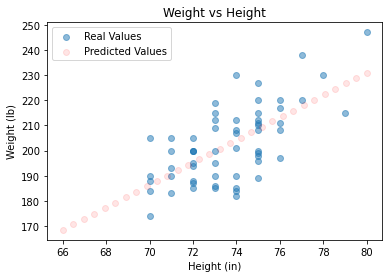

In [4]:
df = pd.read_csv('hockey_draftees_2005.csv')
df.head()
# Make it and fit the model 
x = df.ht.values 
y= df.wt.values

lr = lm.LinearRegression()
x = x.reshape(-1,1)
model = lr.fit(x,y)
# Instantiate the model
newx = np.linspace(66,80,30)
newx = newx.reshape(-1,1)
newy = model.predict(newx)
# Make the scatter plot 
#Generate and plot the predicted values
plt.scatter(x, y, alpha = 0.5, label='Real Values')
plt.scatter(newx, newy, color='red', alpha = 0.1, label='Predicted Values')
plt.ylabel('Weight (lb)')
plt.xlabel('Height (in)')
plt.title('Weight vs Height')
plt.legend(loc="upper left")

# Calculate residuals, R2 and print it  
rsquared = model.score(x,y)
print('Training rsquared is ',rsquared)
assert newx.size == 30
assert round(newy[10],2) == 190.05 
pred_values = []

#calculate residuals

pred_y = model.predict(x)
    
Residuals = y - pred_y.T
print('Residuals are ',Residuals)

### Question 5:  /15pts
### Bootstrap confidence intervals on parameters

How confident can we be about the relation between height and weight? 
To judge this we need confidence intervals let's use the bootstrap.

Modify the function `BootstrapCoef` from lab 04 - part 2 to conduct a boostrap analysis for this regression model; 

* `data`, which is a dataframe having columns 'weight' and 'height'
* `numboot` which is an integer denoting how many bootstrap replications to perform.

The function should return `theta`, a numpy array of regression coefficients of size (numboot, 2)

You can use `pd.DataFrame.sample` with `replace = True` to perform the resampling.  `bootstrap` should return:
params: a numpy array of size [numboot,numParams] of bootstraped parameter values. The parameters are the intercept value and the slope from the linear regression. 
Tip: Note that the intercept can be retrieved from model.intercept_, whereas all the other regression coefficients are stored in model.coef_. 

Here is the documentation for `pd.DataFrame.sample`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

Then call the function to get 100 boostrap samples for your linear regression model of wt explained by height. 
Make a joint scatter plot of the parameter value for the intercept and for the slope. 
Written answer: What do you notice? Why do you think the estimate for the intercept has such a high negative correlation with the slope? 

Text(0.5, 0.98, 'Slope vs Intercept')

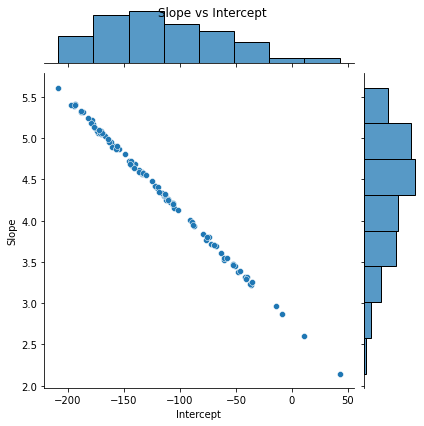

In [5]:
# Write a Bootstrap function that records the fitted models 
def BootstrapCoef(data,numboot=1000):
    n = len(data)
    theta = np.zeros((numboot,2))
    np.random.seed(0)
    for i in range(numboot):
        d = data.sample(n, replace = True)
        x = d.ht.values 
        y= d.wt.values
        lr = lm.LinearRegression()
        x = x.reshape(-1,1)
        model = lr.fit(x,y)
        theta[i][0] = model.intercept_
        theta[i][1] = model.coef_
        
    return theta

theta = BootstrapCoef(df, 1000)
numRows, numCols = theta.shape
assert numRows == 1000 and numCols == 2

theta = BootstrapCoef(df, 100)
theta = theta.T
data = pd.DataFrame({
    'Intercept': theta[0],
    'Slope': theta[1],
})
p = sns.jointplot(x='Intercept', y='Slope', data=data)
p.fig.suptitle("Slope vs Intercept")


Written Answer: I notice that the intercept and the slope are highly colinear. This is expected since the mean of ht was not subtracted before the regression, so it uses the full value instead of the magnitude of deviation.

### Question 6: /12pts

Plot the bootstrap estimates for the slope as a histogram.  Use your samples to compute a 95% confidence interval. Note that the CI should be constructed around the sample estimate of the slope. How can you interpret this confindence interval?  

4.36300999140023


C:\Users\gerri\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


100
My confidence interval is between 2.9166927424802633  and  5.402457209084387


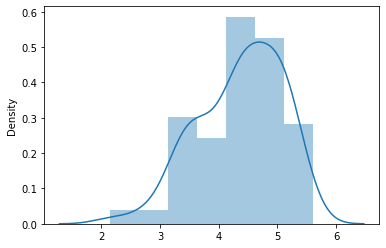

In [6]:
# Calculate bootstrap interval
slopeEstimates = theta[1]
slopeEstimatesMean = slopeEstimates.mean()
print(slopeEstimatesMean)
sns.distplot(slopeEstimates)

boot_quant = np.quantile(slopeEstimates,[0.025,0.975])
print(len(slopeEstimates))

print('My confidence interval is between', boot_quant[0], ' and ', boot_quant[1])

Written answer: The interval contains the true slope parameter with a probability of 95%. 

### Question 7: /15pts
Modify the function `BootstrapPred` from lab04 to bootstrap your fit and generate a predict from each of these bootstrapped models.  

Draw again a scatter plot of height against weight and plot the predictions from the 20 fitted bootstrap models for the height ranging from 60 to 88. 

Written answer: Where are we most uncertain in our prediction about the weight of a player? How does the negative correlation between slope and intercept play a role here?  Why is the spread of the prediction in the mean weight so much lower than the variability of our intercept parameter? 

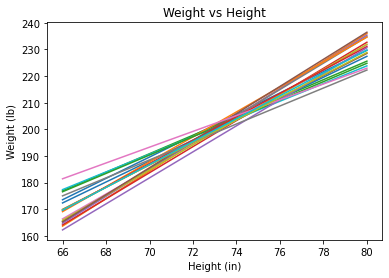

In [7]:
def BootstrapPred(data,xp,numboot=1000):
    n = len(data)
    theta = np.zeros((numboot,2))
    xpred = xp
    ypred = np.zeros((numboot,xp.shape[0]))
    np.random.seed(0)
    for i in range(numboot):
        d = data.sample(n, replace = True)
        x = d.ht.values 
        y= d.wt.values
        lr = lm.LinearRegression()
        x = x.reshape(-1,1)
        model = lr.fit(x,y)
        ypred[i, :] = model.predict(xpred)
        
    return ypred

xp = np.linspace(66,80,30)
xp = xp.reshape(-1,1)
numboot = 20
ypred = BootstrapPred(df, xp,numboot)
for i in range(numboot):
    plt.plot(xp, ypred[i,:])
    plt.ylabel('Weight (lb)')
    plt.xlabel('Height (in)')
    plt.title('Weight vs Height')


The greatest uncertainty we have for the very small and very tall players. As the intercept increases, the slope decreases. In this case, all lines converged in their prediction for the players of mean weight. For the lines to cross in the middle of the graph, a large slope needs to have a small intercept and a small slope needs to have a large intercept. The spread of the predictions for mean weight is lower than the variability of the intercept because there was far more training data for the mean weights, so the bootstrap was far more likely to collect a reflective sample for mean weights than for lower weights. Since bootstrap randomly samples from the population, theres a higher likelikhood that it omits a higher percent of lower weight samples than mean weight samples (since there are more mean weights), so bootstrap will almost always be able to get accurate models for mean weight while being more skewed by the certain data samples when looking at lower weights (intercept).

### Question 8:  /15pts

Now, let's see how well our model performs out of sample.  Load in the `hockey_draftees_test.csv` file into a dataframe.  
Use your fitted `model` to make predictions. 

Make a scatter plot of the test data and superimpose the prediction of the model. 
To evaluate this prediction, calculate the r-square value for the out of sample (oos) data.  Statsmodels doesn't provide a function to compute r-squared on new data.  You will have to write one yourself or find one that performs the computation for you.

174.9634878982837
[67.44827586]
Out of sample rsquared is  -0.015001136144209398


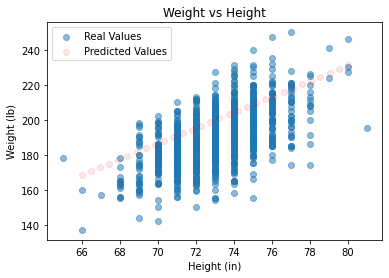

In [8]:
df_test=pd.read_csv('hockey_draftees_test.csv')
df = pd.read_csv('hockey_draftees_2005.csv')
df.head()
# Make it and fit the model 
x = df.ht.values 
y= df.wt.values
lr = lm.LinearRegression()
x = x.reshape(-1,1)
model = lr.fit(x,y)
# Make the scatter plot 

testx = df_test.ht.values
testy = df_test.wt.values
testx = testx.reshape(-1,1)
plt.scatter(testx, testy, alpha = 0.5, label='Real Values')

# Generate and plot the predicted values
testx = np.linspace(66,80,30)
testx = testx.reshape(-1,1)
predtesty = model.predict(testx)

plt.scatter(testx, predtesty, color='red', alpha = 0.1, label='Predicted Values')
plt.ylabel('Weight (lb)')
plt.xlabel('Height (in)')
plt.title('Weight vs Height')
plt.legend(loc="upper left")

# Now do the prediction for the test data and compute R2
print(predtesty[3])
print(testx[3])
assert round(predtesty[3],2) == 174.96

#print('Out of sample rsquared is ', rsquared_oos)

avgy = np.mean(testy)
testx = df_test.ht.values
testx = testx.reshape(-1,1)

predtesty2 = model.predict(testx)
resSum = 0
avgresSum =0
for i in range(len(testx)):
    res = (predtesty2[i] - testy[i])
    resSum = resSum + (res*res)
    avgres = (testy[i] - avgy)
    avgresSum = avgresSum + (avgres*avgres)

variance = avgresSum - resSum
r2 = variance/avgresSum
print('Out of sample rsquared is ', r2)
